<a href="https://colab.research.google.com/github/mojtabaSefidi/Dataminig-small-projects/blob/main/NYC_Airbnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!gdown --id 1piAtNSWvffiVst9eodcFJdV82_4_erR9

Downloading...
From: https://drive.google.com/uc?id=1piAtNSWvffiVst9eodcFJdV82_4_erR9
To: /content/AB_NYC_2019.csv
100% 7.08M/7.08M [00:00<00:00, 43.1MB/s]


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sn.set()

In [7]:
data = pd.read_csv('AB_NYC_2019.csv')
print(data.shape)
data.head(3).T


(48895, 16)


,0,1,2
id,2539,2595,3647
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !
host_id,2787,2845,4632
host_name,John,Jennifer,Elisabeth
neighbourhood_group,Brooklyn,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem
latitude,40.6475,40.7536,40.809
longitude,-73.9724,-73.9838,-73.9419
room_type,Private room,Entire home/apt,Private room
price,149,225,150


In [8]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,19017143.0,10983108.0,2539.0,9471945.0,19677284.0,29152178.0,36487245.0
host_id,48895.0,67620011.0,78610967.0,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
latitude,48895.0,41.0,0.0,40.0,41.0,41.0,41.0,41.0
longitude,48895.0,-74.0,0.0,-74.0,-74.0,-74.0,-74.0,-74.0
price,48895.0,153.0,240.0,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.0,21.0,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,23.0,45.0,0.0,1.0,5.0,24.0,629.0
reviews_per_month,38843.0,1.0,2.0,0.0,0.0,1.0,2.0,58.0
calculated_host_listings_count,48895.0,7.0,33.0,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,113.0,132.0,0.0,0.0,45.0,227.0,365.0


In [9]:
data.set_index('id',drop=True,inplace=True)
data.reset_index(drop=True, inplace=True)
data.head(3).T

,0,1,2
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !
host_id,2787,2845,4632
host_name,John,Jennifer,Elisabeth
neighbourhood_group,Brooklyn,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem
latitude,40.6475,40.7536,40.809
longitude,-73.9724,-73.9838,-73.9419
room_type,Private room,Entire home/apt,Private room
price,149,225,150
minimum_nights,1,1,3


In [10]:
data.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [11]:
data.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
data['name'].fillna('Unknown',inplace=True)
data['host_name'].fillna('Unknown',inplace=True)
data['last_review'].fillna('No review',inplace=True)
data['reviews_per_month'].fillna(0,inplace=True)
data.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [32]:
print(data['neighbourhood_group'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [14]:
data.groupby(['neighbourhood_group','room_type']).room_type.count().unstack(fill_value=0)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


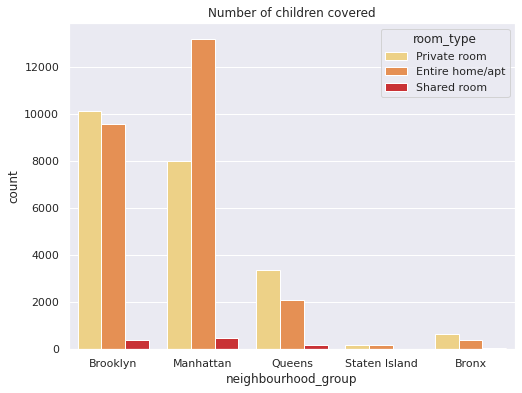

In [15]:
plt.figure(figsize=(8,6))
plt.title('Number of children covered')
sn.countplot(data['neighbourhood_group'],hue=data['room_type'], palette='YlOrRd')

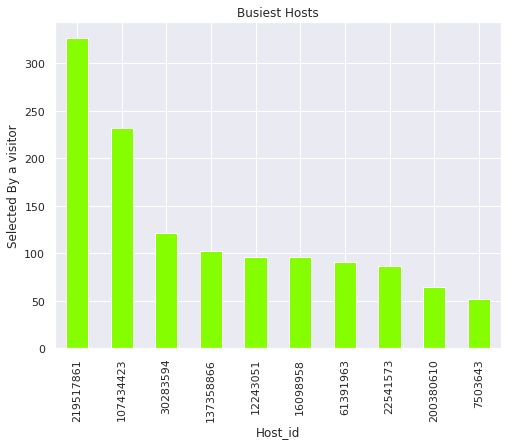

In [37]:
plt.figure(figsize=(8,6))
plt.xlabel('Host_id')
plt.ylabel('Selected By a visitor')
plt.title('Busiest Hosts')
data['host_id'].value_counts().iloc[:10].plot(kind = 'bar',color='#85FF00')

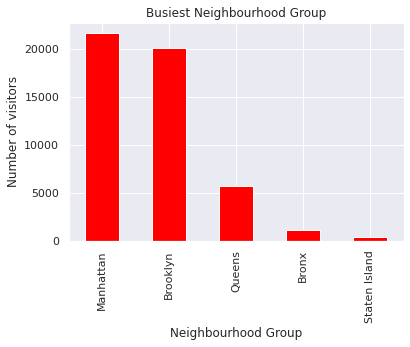

In [17]:
plt.figure(figsize=(6,4))
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of visitors')
plt.title('Busiest Neighbourhood Group')
data['neighbourhood_group'].value_counts().plot(kind = 'bar',color='Red')

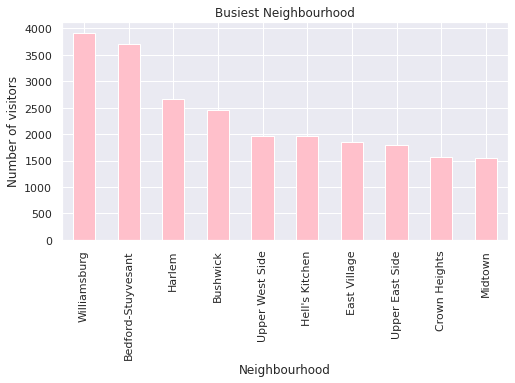

In [18]:
plt.figure(figsize=(8,4))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of visitors')
plt.title('Busiest Neighbourhood')
data['neighbourhood'].value_counts().iloc[:10].plot(kind = 'bar',color='Pink')

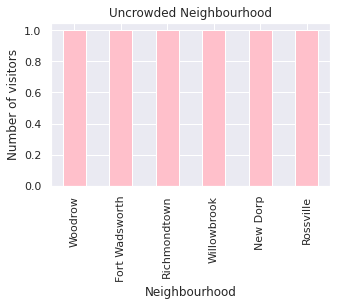

In [19]:
plt.figure(figsize=(5,3))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of visitors')
plt.title('Uncrowded Neighbourhood')
data['neighbourhood'].value_counts().iloc[-6:].plot(kind = 'bar',color='Pink')

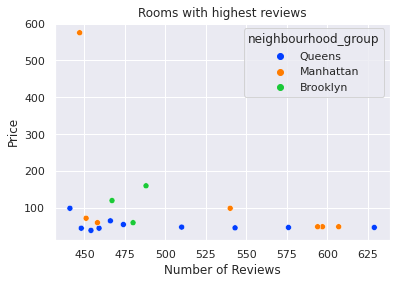

In [20]:

plt.figure(figsize=(6,4))
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Rooms with highest reviews')
sn.scatterplot(data = data.sort_values(by='number_of_reviews', ascending=False).iloc[:20],
               x='number_of_reviews',y='price',hue='neighbourhood_group',palette='bright')

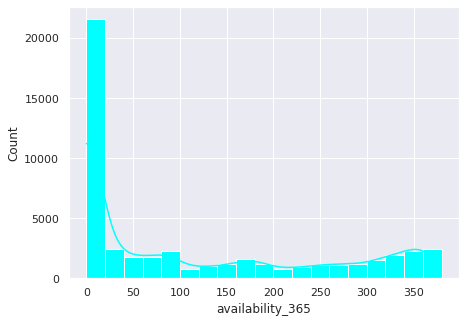

In [21]:
plt.figure(figsize=(7,5))
sn.histplot(data["availability_365"],color='cyan',binwidth=20,kde=True,alpha=1)

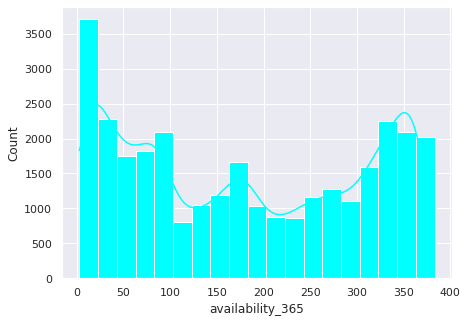

In [22]:
plt.figure(figsize=(7,5))
sn.histplot(data[data['availability_365'] >= 3]['availability_365'],color='cyan',binwidth=20,kde=True,alpha=1)

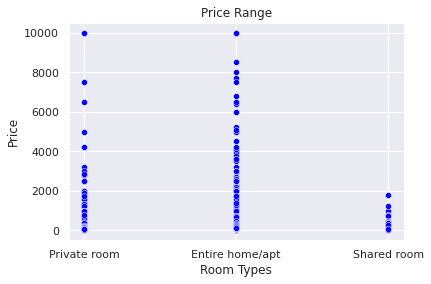

In [23]:
plt.figure(figsize=(6,4))
plt.xlabel('Room Types')
plt.ylabel('Price')
plt.title('Price Range')
sn.scatterplot(data=data, x="room_type", y="price",color='Blue');

Skewness of price column: 1.593327


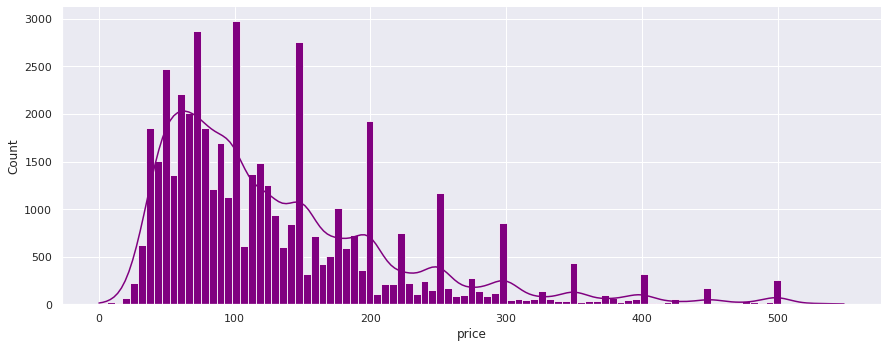

In [24]:
q = data["price"].quantile(0.98)
temp_data = data[data["price"]<q]
print("Skewness of price column: %f" % temp_data['price'].skew())
sn.displot(temp_data["price"], color='purple', kde=True, aspect=2.5, alpha = 1)

Text(0.5, 1.0, 'Free Rooms')

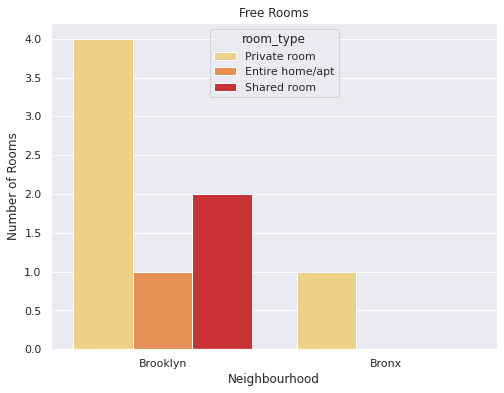

In [25]:
plt.figure(figsize=(8,6))
new = data[(data['availability_365'] >= 1) & (data['price'] == 0)]
sn.countplot(x=new['neighbourhood_group'],hue=new['room_type'], palette='YlOrRd')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Rooms')
plt.title('Free Rooms')

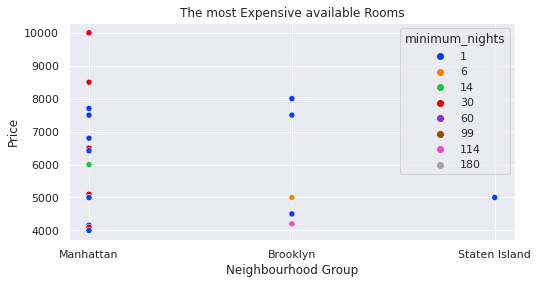

In [26]:
plt.figure(figsize=(8,4))
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('The most Expensive available Rooms')
sn.scatterplot(data = data[data['availability_365'] >= 1].sort_values(by='price', ascending=False).iloc[:25],
               x='neighbourhood_group',y='price',hue='minimum_nights',palette='bright')

In [27]:
Price_avg = pd.DataFrame(data.groupby(['neighbourhood_group','room_type']).mean()['price']).round()
Price_avg.style.background_gradient(cmap="YlOrRd")

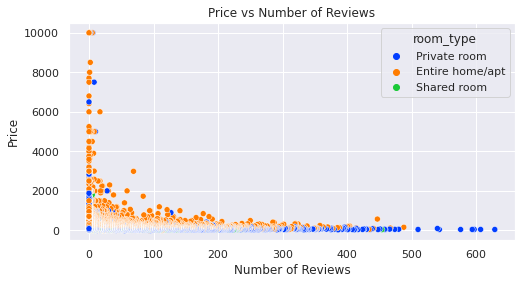

In [28]:
plt.figure(figsize=(8,4))
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs Number of Reviews')
sn.scatterplot(data = data.sort_values(by='number_of_reviews', ascending=False),
               x='number_of_reviews',y='price',hue='room_type',palette='bright')


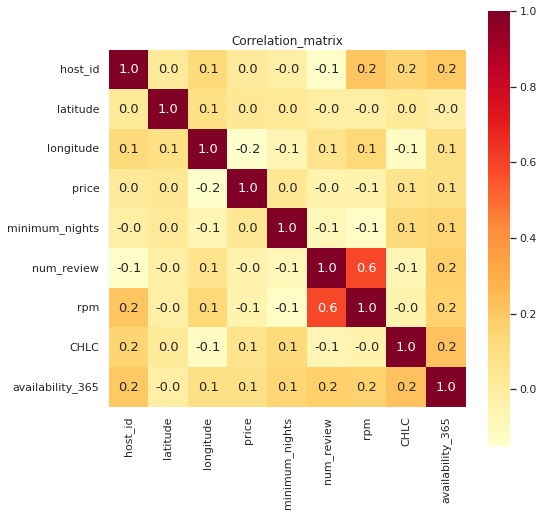

In [29]:
data2 = data.copy()
data2.rename(columns={'number_of_reviews':'num_review','reviews_per_month':'rpm','calculated_host_listings_count':'CHLC'}, inplace=True)

feature_correlation = data2.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation_matrix')
sn.heatmap(feature_correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':13}, cmap='YlOrRd')

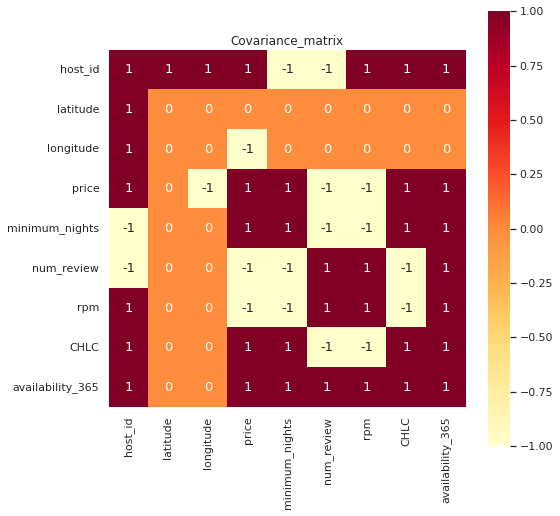

In [30]:
feature_covariance = data2.cov()
for name in feature_covariance.columns :
      feature_covariance[name] = feature_covariance[name].astype(int)
feature_covariance[feature_covariance == 0] = 0
feature_covariance[feature_covariance > 0] = 1
feature_covariance[feature_covariance < 0] = -1
plt.figure(figsize=(8,8))
plt.title('Covariance_matrix')
sn.heatmap(feature_covariance, cbar=True, square= True, annot=True, annot_kws={'size':13}, cmap='YlOrRd')

In [34]:
clustered_Data = data[['latitude','longitude']]
x = clustered_Data[['latitude','longitude']]
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

kmeans = KMeans(5)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)
clustered_Data["clusters"] = clusters
clustered_Data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,latitude,longitude,clusters
0,40.64749,-73.97237,4
1,40.75362,-73.98377,3
2,40.80902,-73.94190,0
3,40.68514,-73.95976,2
4,40.79851,-73.94399,0


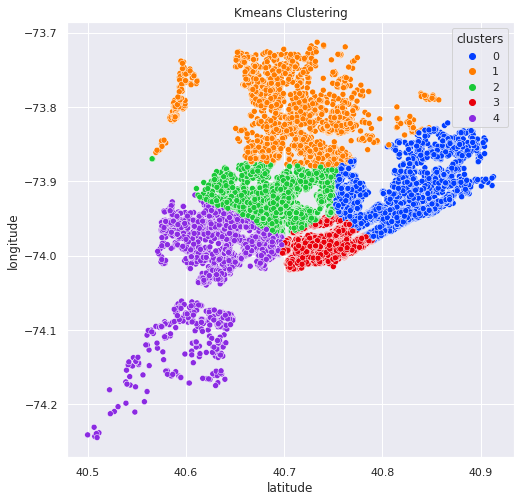

In [35]:
plt.figure(figsize=(8,8))
plt.title('Kmeans Clustering')
sn.scatterplot(x=clustered_Data["latitude"],y=clustered_Data["longitude"],hue = clustered_Data['clusters'],palette='bright')

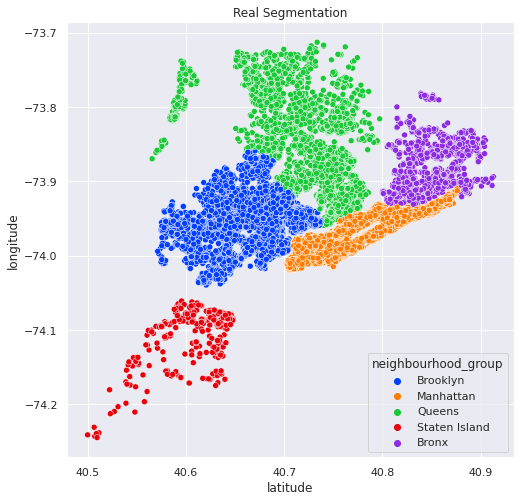

In [36]:
plt.figure(figsize=(8,8))
plt.title('Real Segmentation')
sn.scatterplot(x= data["latitude"],y=data["longitude"],hue = data['neighbourhood_group'],palette='bright')
